Hello!

In this notebook I analyze some data relating to restaurants in Bangalore. It is quite a large dataset with more than 40,000 restaurants. Each one has a quite a few datapoints, including ratings, number of votes, location, cuisine, etc.

We will look at this dataset to see what are the main factors influencing a restaurant's score. There may be a positive correlation between variables, but a strong negative correlation is also greatly informative.

As our dataset is large, we have many tools available to us. We will walk through a few of them in this notebook.

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


Importing the data for Restaurants in Bangalore:

In [2]:
os.listdir('/kaggle/input')
df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

Removing some of the columns that we're not interested in (url, phone number, etc. not relevant for our purposes). Some are removed because there are too many different types of responses, which makes interpreting/quantifying difficult.

In [3]:
df.head()
df.drop(["url", "address", "name", "phone", "dish_liked", "menu_item", "reviews_list"], axis=1, inplace=True)

Check that they were removed as desired:

In [4]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Removing all NaN values, and resetting the index values.

In [5]:
#dropping NaNs
df = df.dropna(axis=0).reset_index(drop=True)
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Now we want to clean up the ratings, so first we remove all the ones with non-desired inputs like "NEW" or "-" by keeping all the ones containing a "/".

In [6]:
df = df[df["rate"].str.contains("/") == True]
df = df.reset_index(drop=True)
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Then we take out all the ratings and keep them separately for adjustments.

In [7]:
ratings = df.loc[:,"rate"]
ratings = ratings.reset_index(drop=True)

print(ratings)

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
41258    3.7 /5
41259    2.5 /5
41260    3.6 /5
41261    4.3 /5
41262    3.4 /5
Name: rate, Length: 41263, dtype: object


Here we run through the new ratings list (df), converting them to a numerical value rather than the string with "X/5"

In [8]:
for i in range(len(ratings)):
    if str(ratings[i])==ratings[i] and "/" in ratings[i]:
        ratings[i] = float(ratings[i][0:ratings[i].index("/")])
    else:
        ratings[i] = float(ratings[i])
    
print(ratings)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
41258    3.7
41259    2.5
41260    3.6
41261    4.3
41262    3.4
Name: rate, Length: 41263, dtype: object


And finally inputting them back into the df:

In [9]:
df["rate"] = ratings

In [10]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


We should also check that the votes and cost are integers. I already checked that the votes are all ints so that is fine. Below we found that the costs are strings, and some contain commas which cant directly be converted into float or int, so below we remove those commas and then convert to float.

In [11]:
print(df["approx_cost(for two people)"].dtype) #as this returns Object, it is not only strings/floats.
costs = df.loc[:,"approx_cost(for two people)"]
for i in range(len(costs)):
    costs[i] = costs[i].replace(",","")
df["approx_cost(for two people)"] = costs.astype(float)

object


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Visualizing some of our data using seaborn:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1.8'),
  Text(1, 0, '2.0'),
  Text(2, 0, '2.1'),
  Text(3, 0, '2.2'),
  Text(4, 0, '2.3'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.6'),
  Text(8, 0, '2.7'),
  Text(9, 0, '2.8'),
  Text(10, 0, '2.9'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.1'),
  Text(13, 0, '3.2'),
  Text(14, 0, '3.3'),
  Text(15, 0, '3.4'),
  Text(16, 0, '3.5'),
  Text(17, 0, '3.6'),
  Text(18, 0, '3.7'),
  Text(19, 0, '3.8'),
  Text(20, 0, '3.9'),
  Text(21, 0, '4.0'),
  Text(22, 0, '4.1'),
  Text(23, 0, '4.2'),
  Text(24, 0, '4.3'),
  Text(25, 0, '4.4'),
  Text(26, 0, '4.5'),
  Text(27, 0, '4.6'),
  Text(28, 0, '4.7'),
  Text(29, 0, '4.8'),
  Text(30, 0, '4.9')])

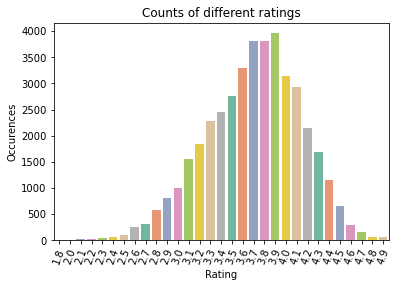

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

#showing the spread of ratings, looks approx normal with a nevative skew.
sns.countplot(x = 'rate', palette = 'Set2', data = df)
plt.xlabel("Rating")
plt.ylabel("Occurences")
plt.title("Counts of different ratings")
plt.xticks(rotation=70)

#then testing with online_order it seems there's about twice as many that allow it than don't
#testing with book_table it seems that most don't, but still more than 5000 do.
#testing with listed_in(type) we have 7 types of restaurant.

The below code drops some more of the variables that are harder to quantify. Instead we'll focus on some things that are easier to work with. When using "describe" however, nothing shows up for "rate", indicating that there's something wrong with its data.

In [13]:
df2 = df.copy() #we'll continue working with df2 just to avoid damaging the original data by accident from here on.
df2.drop(["location", "rest_type", "cuisines", "listed_in(city)"], axis=1, inplace=True)
df2.head()
df2.describe()

,votes,approx_cost(for two people)
count,41263.000000,41263.000000
mean,352.683179,603.914063
std,884.177761,464.942973
min,0.000000,40.000000
25%,21.000000,300.000000
50%,73.000000,500.000000
75%,277.000000,750.000000
max,16832.000000,6000.000000


To fix this we can simply convert the whole column into floats:

In [14]:
df2['rate'] = df2['rate'].astype(float)

Running Describe() again below shows that it worked

In [15]:
df2.describe()

,rate,votes,approx_cost(for two people)
count,41263.000000,41263.000000,41263.000000
mean,3.702011,352.683179,603.914063
std,0.439985,884.177761,464.942973
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,277.000000,750.000000
max,4.900000,16832.000000,6000.000000


Now the votes and costs are all ints or floats.
Lastly double checking our data:

In [16]:
df2.head()

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,800.0,Buffet
1,Yes,No,4.1,787,800.0,Buffet
2,Yes,No,3.8,918,800.0,Buffet
3,No,No,3.7,88,300.0,Buffet
4,No,No,3.8,166,600.0,Buffet


The below new DF is for later, where I'll visualize the ratings of different types of restaurants.

In [17]:
df3 = df2.copy()

Now, I want to turn some of our categorical data into numerical values to help our learning model later.

In [18]:
df2 = pd.get_dummies(df2, columns=["online_order", "book_table", "listed_in(type)"])
df2.head()

,rate,votes,approx_cost(for two people),online_order_No,online_order_Yes,book_table_No,book_table_Yes,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,4.1,775,800.0,0,1,0,1,1,0,0,0,0,0,0
1,4.1,787,800.0,0,1,1,0,1,0,0,0,0,0,0
2,3.8,918,800.0,0,1,1,0,1,0,0,0,0,0,0
3,3.7,88,300.0,1,0,1,0,1,0,0,0,0,0,0
4,3.8,166,600.0,1,0,1,0,1,0,0,0,0,0,0


We will also normalize our votes and cost columns to 1:

In [19]:
df2["approx_cost(for two people)"] = df2["approx_cost(for two people)"] / df2["approx_cost(for two people)"].max()
df2["votes"] = df2["votes"] / df2["votes"].max()

In [20]:
df2.head()

,rate,votes,approx_cost(for two people),online_order_No,online_order_Yes,book_table_No,book_table_Yes,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,4.1,0.046043,0.133333,0,1,0,1,1,0,0,0,0,0,0
1,4.1,0.046756,0.133333,0,1,1,0,1,0,0,0,0,0,0
2,3.8,0.054539,0.133333,0,1,1,0,1,0,0,0,0,0,0
3,3.7,0.005228,0.050000,1,0,1,0,1,0,0,0,0,0,0
4,3.8,0.009862,0.100000,1,0,1,0,1,0,0,0,0,0,0


Now we essentially have our polished data - with all the votes and costs normalized to 1 and as floats, ratings are floats, and all the categorical data has been converted into 1s and 0s.

In [21]:
df2.describe()

,rate,votes,approx_cost(for two people),online_order_No,online_order_Yes,book_table_No,book_table_Yes,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
count,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000
mean,3.702011,0.020953,0.100652,0.343189,0.656811,0.847224,0.152776,0.020551,0.036619,0.495650,0.065652,0.340887,0.025325,0.015316
std,0.439985,0.052530,0.077490,0.474780,0.474780,0.359776,0.359776,0.141878,0.187826,0.499987,0.247676,0.474013,0.157113,0.122809
min,1.800000,0.000000,0.006667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,0.001248,0.050000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,0.004337,0.083333,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.016457,0.125000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,4.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we can start to process it.
We can begin with a heat map as shown below to view correlations between variables. A few of these seem logical, like that if you can book a table the cost and ratings are likely to be higher. But most of these have relatively low correlations which is good.

Text(104.09374999999999, 0.5, 'Variables')

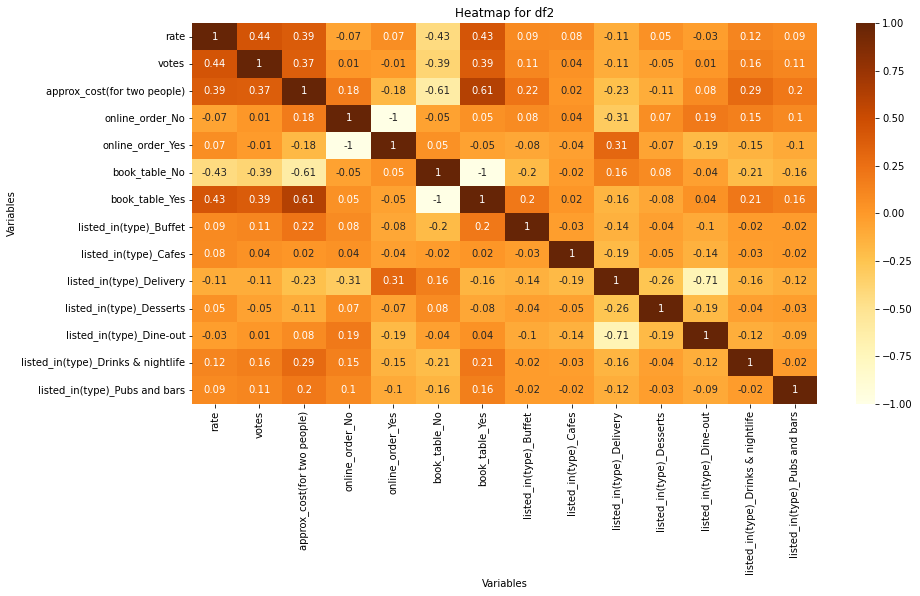

In [22]:
correlation = df2.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')
plt.title("Heatmap for df2")
plt.xlabel("Variables")
plt.ylabel("Variables")

We will then separate our data into independent and dependent sets:

In [23]:
X = df2.drop("rate", axis=1) #taking the whole df2 without ratings (so all indpt variables)
X = X.values #the variable X contains a df so here we convert it to an array
#this is because learning algorithms tend to work with arrays and not dfs.

Y = df["rate"] #taking our dependent variable.
print(Y)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
41258    3.7
41259    2.5
41260    3.6
41261    4.3
41262    3.4
Name: rate, Length: 41263, dtype: object


Creating a training and validation set:

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Implenting a Random Forest model

In [25]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
model1.fit(X_train, Y_train)

# Use the model to make predictions on the test data
Y_pred = model1.predict(X_test)

# Evaluate the model using mean squared error (MSE)
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(Y_test, Y_pred))

MSE: 0.0657368481994863


Our MSE is very low, great!.
Checking the weights of the different independent variables:

In [26]:
importances1 = model1.feature_importances_

# Print the feature importances
print("Feature importances:", importances1)

Feature importances: [0.74393644 0.1501539  0.01687348 0.01714611 0.00749165 0.01396354
 0.00277555 0.00675573 0.01176406 0.01478244 0.01212457 0.00131855
 0.00091398]


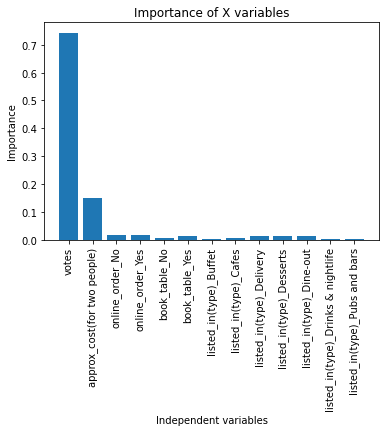

In [27]:
# Plot the feature importances
import matplotlib.pyplot as plt

plt.bar(df2.drop("rate", axis=1).columns, importances1)
plt.xlabel("Independent variables")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Importance of X variables")
plt.show()

Another metric for our model is the regressor score, which we can calculate using .score().

In [28]:
regressor_score = model1.score(X_test,Y_test)

In [29]:
print(regressor_score)

0.6595859632800143


Somewhat low regressor score.

The above importances makes a lot of sense, it's logical that a restaurant that is good will have many guests (thus many reviews) and a high ranking. It also makes sense that a well-liked restaurant is likely to have high prices.

It doesn't have to be positvely correlated though! A restaurant could also have high prices despite having low scores - in which case the prices are also an important factor for the rating.

Now lets do the same analysis without those two columns as they clearly dominate the model. Here we'll use the same variable names with a suffix of 2. Below is the assignment of independent and dependent variables.

In [30]:
X2 = df2.drop(["rate", "votes", "approx_cost(for two people)"], axis=1)
X2 = X2.values

Y2 = df2["rate"]

Below we once again split the data into training and test set.

In [31]:
from sklearn.model_selection import train_test_split
X2_train,X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 0)

Just checking the sizes of our data sets - these must match up for our model to work.

In [32]:
print(len(X2_train[0]))
print(len(X2_test[0]))

print(len(Y2_train))
print(len(X2_train))

print(len(Y2_test))
print(len(X2_test))

11
11
28884
28884
12379
12379


Once again using random forests to create our model (model2).

In [33]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
model2.fit(X2_train, Y2_train)

# Use the model to make predictions on the test data
Y2_pred = model2.predict(X2_test)

# Evaluate the model using mean squared error (MSE)
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(Y2_test, Y2_pred))

MSE: 0.15313748077989328


The new MSE is higher than before. This makes sense, as the results from the previous tests showed that the number of votes and the price were of greatest importance, while the other variables were very evenly (and weakly) important. So, when creating a new model with these other variables, we have a less reliable model.



Lets check the regressor score for this new model:

In [34]:
regressor_score2 = model2.score(X2_test,Y2_test)
print(regressor_score2)

0.20698741370718665


Our new regressor score is significantly lower than for our first model. This makes sense, as explained above relating to the higher MSE.

Below we check the importances in our new model:

In [35]:
importances2 = model2.feature_importances_

# Print the feature importances
print("Feature importances:", importances2)

Feature importances: [0.01212975 0.04672756 0.83485324 0.         0.00336462 0.03357458
 0.00595003 0.04339424 0.00206241 0.01260348 0.00534009]


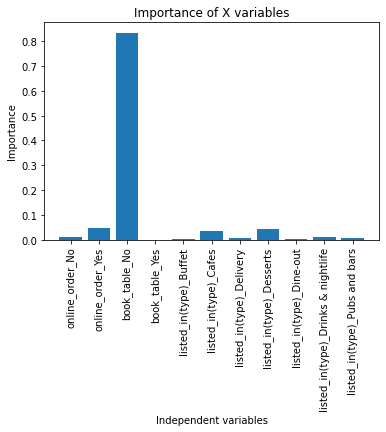

In [36]:
# Plot the feature importances
import matplotlib.pyplot as plt

plt.bar(df2.drop(["rate", "votes", "approx_cost(for two people)"], axis=1).columns, importances2)
plt.xlabel("Independent variables")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Importance of X variables")
plt.show()

Overwhelmingly, a restaurant not taking bookings is the biggest factor in its rating for our new set of independent variables. Here, I would imagine that there is a negative correlation between the two - that a restaurant not taking bookings is likely to have lower ratings. Lets visualize this to check!

Below I have plotted the ratings of restaurants on the x axis and their density (normalized to 1) on the y axis. Each graph also displays this data for two different cases. The first one looks at bookings, the second looks at online orders, and lastly whether a restaurant has the listed_in(type) value of "delivery".

Text(0.5, 0.98, 'Ratings density - 3 cases')

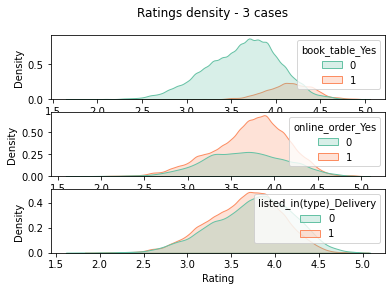

In [47]:
fig,axes = plt.subplots(3,1)

sns.kdeplot(x = 'rate', hue = 'book_table_Yes', palette = 'Set2', shade=True, data = df2, ax=axes[0])

sns.kdeplot(x = 'rate', hue = 'online_order_Yes', palette = 'Set2', shade=True, data = df2, ax=axes[1])

sns.kdeplot(x = 'rate', hue = 'listed_in(type)_Delivery', palette = 'Set2', shade=True, data = df2, ax=axes[2])

axes[0].set_xlabel("Rating")
axes[1].set_xlabel("Rating")
axes[2].set_xlabel("Rating")
fig.suptitle("Ratings density - 3 cases")


The first graph above agrees with my proposal - restaurants which do not take bookings have a lower mean rating. This is further significant as the number of restaurants which do not take bookings is much greater than the number of restaurants which do, and yet there are more bookable restaurants with higher ratings!

Whether a restaurant takes online orders is less indicative, although restaurants which do take online orders have a lower spread (lower standard deviation) than those that don't. We could calculate the specific values for mean and standard deviation if we want.

Lastly, whether a restaurant performs delivery is not a significant factor for ratings, where restaurants that don't deliver are only slightly higher rated on average. The spreads are also very similar between the two groups.

We can also look at ratings grouped into all 7 restaurant categories. Using df3 below as this dataframe still has the listed_in(type) column unchanged from the start and I know that ratings have been converted into floats as desired.

Text(0.5, 1.0, 'Ratings by Restaurant Type')

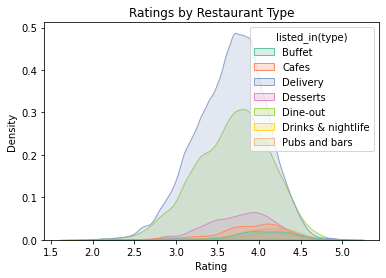

In [38]:
sns.kdeplot(x = 'rate', hue = 'listed_in(type)', palette = 'Set2', shade=True, data = df)
plt.xlabel("Rating")
plt.ylabel("Density")
plt.title("Ratings by Restaurant Type")

Here we see quite similar mean scores for the different restaurant types, with some having more spread than others. We can check the specific mean and STD values:

In [39]:
buffet_m = df3.loc[df3["listed_in(type)"]=="Buffet","rate"].mean()
buffet_std = df3.loc[df3["listed_in(type)"]=="Buffet","rate"].std()
cafes_m = df3.loc[df3["listed_in(type)"]=="Cafes","rate"].mean()
cafes_std = df3.loc[df3["listed_in(type)"]=="Cafes","rate"].std()
delivery_m = df3.loc[df3["listed_in(type)"]=="Delivery","rate"].mean()
delivery_std = df3.loc[df3["listed_in(type)"]=="Delivery","rate"].std()
desserts_m = df3.loc[df3["listed_in(type)"]=="Desserts","rate"].mean()
desserts_std = df3.loc[df3["listed_in(type)"]=="Desserts","rate"].std()
dineout_m = df3.loc[df3["listed_in(type)"]=="Dine-out","rate"].mean()
dineout_std = df3.loc[df3["listed_in(type)"]=="Dine-out","rate"].std()
drinksnightlife_m = df3.loc[df3["listed_in(type)"]=="Drinks & nightlife","rate"].mean()
drinksnightlife_std = df3.loc[df3["listed_in(type)"]=="Drinks & nightlife","rate"].std()
pubsbars_m = df3.loc[df3["listed_in(type)"]=="Pubs and bars","rate"].mean()
pubsbars_std = df3.loc[df3["listed_in(type)"]=="Pubs and bars","rate"].std()

print(f"Buffet mean {buffet_m} and std {buffet_std}")
print(f"Cafes mean {cafes_m} and std {cafes_std}")
print(f"Delivery mean {delivery_m} and std {delivery_std}")
print(f"Desserts mean {desserts_m} and std {desserts_std}")
print(f"Dineout mean {dineout_m} and std {dineout_std}")
print(f"Drinks & nightlife mean {drinksnightlife_m} and std {drinksnightlife_std}")
print(f"Pubs and bars mean {pubsbars_m} and std {pubsbars_std}")

Buffet mean 3.9813679245283016 and std 0.46222807917237185
Cafes mean 3.8721376571806747 and std 0.4284555625936271
Delivery mean 3.6550850772540575 and std 0.41789825231956873
Desserts mean 3.7790697674418605 and std 0.40189876874076724
Dineout mean 3.6825252381629463 and std 0.45144667750856193
Drinks & nightlife mean 4.016363636363637 and std 0.4339851219025155
Pubs and bars mean 4.022626582278481 and std 0.42304166109972974


Lets compare these a little further by visualizing them:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


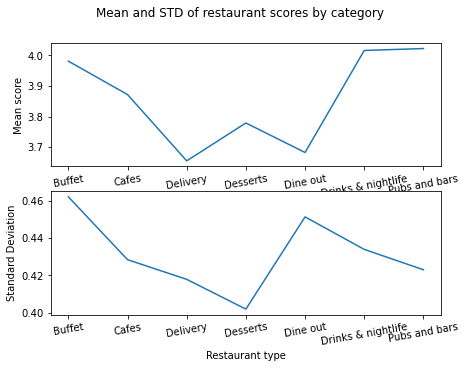

In [40]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(7, 5))
ax1.set_xticklabels(["Buffet", "Cafes", "Delivery", "Desserts", "Dine out", "Drinks & nightlife", "Pubs and bars"], rotation=10)
ax2.set_xticklabels(["Buffet", "Cafes", "Delivery", "Desserts", "Dine out", "Drinks & nightlife", "Pubs and bars"], rotation=10)
ax1.plot(["Buffet", "Cafes", "Delivery", "Desserts", "Dine out", "Drinks & nightlife", "Pubs and bars"], [buffet_m, cafes_m, delivery_m,desserts_m,dineout_m,drinksnightlife_m,pubsbars_m])

ax2.plot(["Buffet", "Cafes", "Delivery", "Desserts", "Dine out", "Drinks & nightlife", "Pubs and bars"], [buffet_std, cafes_std, delivery_std,desserts_std,dineout_std,drinksnightlife_std,pubsbars_std])

ax1.set_xlabel("Restaurant type")
ax1.set_ylabel("Mean score")

ax2.set_xlabel("Restaurant type")
ax2.set_ylabel("Standard Deviation")

fig.suptitle("Mean and STD of restaurant scores by category")

plt.show()

Buffets, drinks&nightlife and pubs&bars clearly have the highest scores, but with the first one of these also having the highest standard deviation of all categories. It is clear that although buffets are generally well liked, there are many that have lower (as well as EVEN higher) ratings.

The other two categories mentioned have high ratings but mid-range STD, indicating that they are more reliably high-scoring.

Lastly, restaurants grouped as dine-out score the second-lowest on average, but have the second highest STD. This implies that the spread is quite large and there may be quite a few very high-scoring dine-out restaurants, although the majority are not well-liked.

I hope you've enjoyed this notebook! We could analyze this data further, of course. I could have implemented different learning models or tried to include some of the data that we excluded from our dataset.